In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Flight Price
Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [ ]:
flightDf = pd.read_excel('flight_price.xlsx')

In [ ]:
flightDf

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
flightDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


There are a total of 10683 rows and 11 columns

Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.


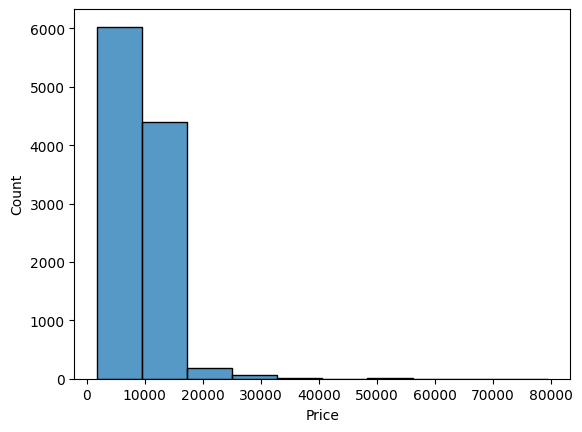

In [ ]:
sns.histplot(data=flightDf, x="Price", bins=10)
plt.show()

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [ ]:
flightDf['Price'].max()

79512

Maximum price is 79512

In [ ]:
flightDf['Price'].min()

1759

Minimum price is 1759

Range of prices is from 1759 to 79512

Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

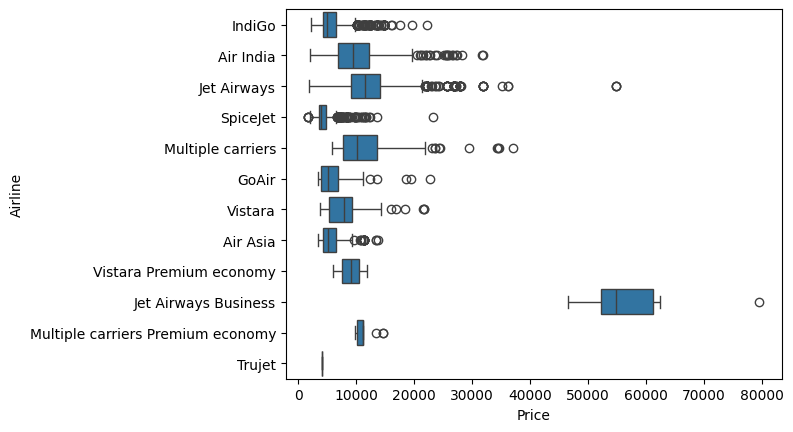

In [ ]:
sns.boxplot(x=flightDf['Price'], y=flightDf['Airline'])
plt.show()

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

According to the boxplot created above with the prices of each airlines, Jet Airways and Jet Airways Business have outliers in price such as 600000 and 80000 respectively. This will greatly affect the analysis if we want to analyze the central tendencies such as mean and median. The outliers can also impact the standard deviation that would seem more disperse than it actually is.

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

To identify the peak season, 'Prices' and 'Date_of_Journey' features should be analyzed and show the distribution plot of the these features

In [ ]:
flightDf['Date_of_Journey'] = pd.to_datetime(flightDf['Date_of_Journey'])
flightDf.sort_values(by='Date_of_Journey', inplace=True)
flightDf['Date_of_Journey']

<ipython-input-12-a757df6221a4>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  flightDf['Date_of_Journey'] = pd.to_datetime(flightDf['Date_of_Journey'])


959    2019-01-03
6336   2019-01-03
1654   2019-01-03
6321   2019-01-03
6314   2019-01-03
          ...    
9873   2019-12-06
5993   2019-12-06
7260   2019-12-06
4997   2019-12-06
1081   2019-12-06
Name: Date_of_Journey, Length: 10683, dtype: datetime64[ns]

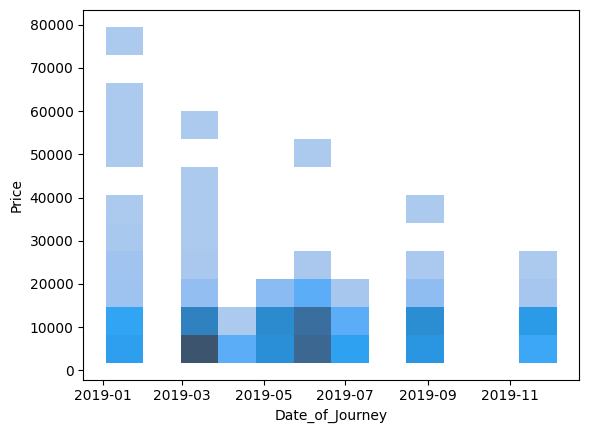

In [ ]:
sns.histplot(data=flightDf, y="Price", x='Date_of_Journey', bins=12)
plt.show()

In the above distribution plot, it seems that January and March months are the peak months because of the higher pricing of the flights for these months.

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

The average flight price by month for monthly price trend. Show the bar plot of the average price per month

In [ ]:
flightDf['Month'] = flightDf['Date_of_Journey'].dt.month
avg_per_month = flightDf.groupby('Month')['Price'].mean()
avg_per_month

Month
1     10492.642791
3      8433.839891
4      5230.860849
5      9361.077628
6      9214.964905
9      9551.474395
12     9110.774295
Name: Price, dtype: float64

<ipython-input-26-cab5b1083db7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_per_month.values, x=avg_per_month.index, palette='viridis')


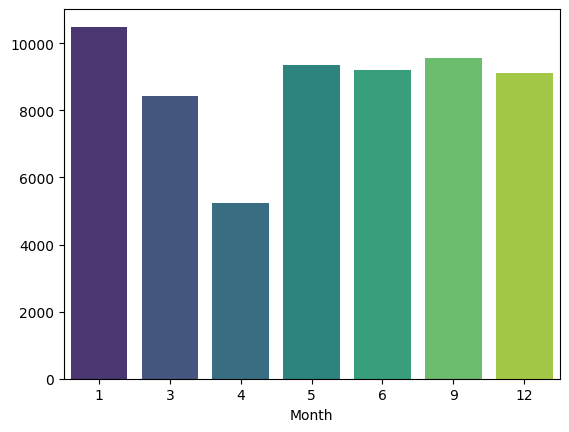

In [ ]:
sns.barplot(y=avg_per_month.values, x=avg_per_month.index, palette='viridis')
plt.show()

The flight price is highes in January and lowest in April

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

Source and Destination affect flight prices and we can present these via barplot.

In [ ]:
# Since Delhi is the same with New Delhi, we replace it to New Delhi to be consistent for analysis and plotting
flightDf['Destination'] = flightDf['Destination'].replace('Delhi', 'New Delhi')

959     New Delhi
6336    New Delhi
1654    New Delhi
6321    New Delhi
6314    New Delhi
          ...    
9873       Cochin
5993     Banglore
7260       Cochin
4997     Banglore
1081       Cochin
Name: Destination, Length: 10683, dtype: object

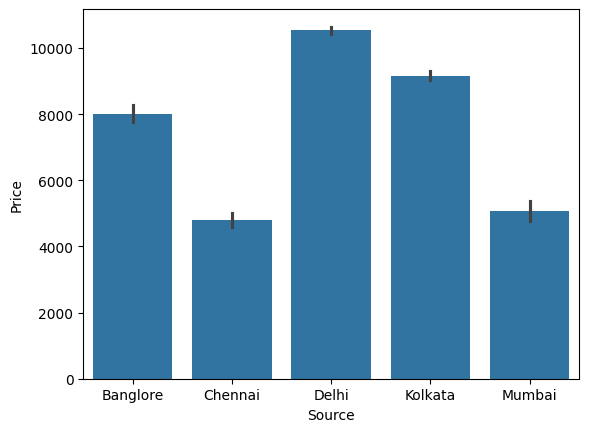

In [ ]:
sns.barplot(data=flightDf, y="Price", x="Source")
plt.show()

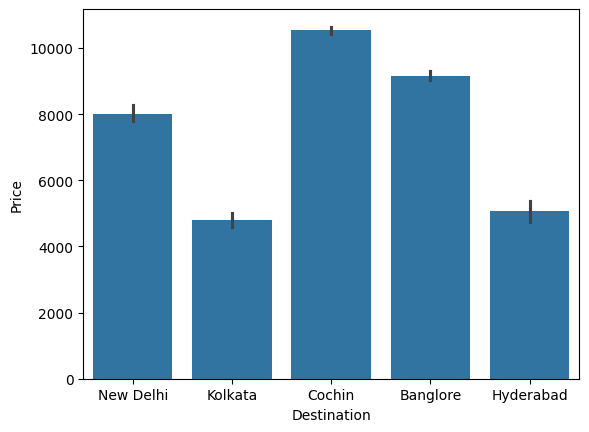

In [ ]:
sns.barplot(data=flightDf, y="Price", x="Destination")
plt.show()

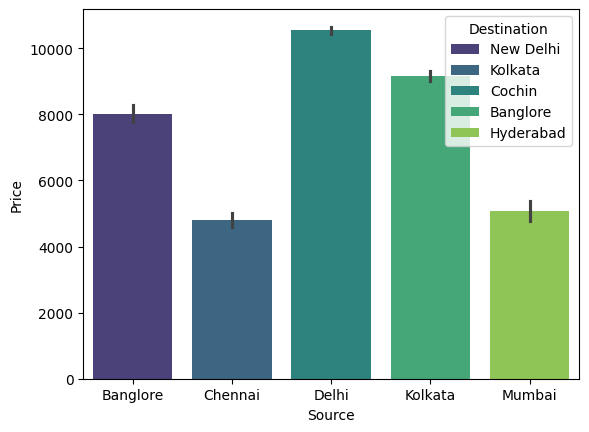

In [ ]:
sns.barplot(x='Source', y='Price', hue='Destination', data=flightDf, palette='viridis')
plt.show()

In the above barplot, Delhi to Cochin is the most expensive flight in terms of prices. Chennai to Kolkata is the least expensive flight.

We can also check the duration of flight with the prices and present these via scatter plot to check the relationship of the duration and prices.

In [ ]:
def convert_into_hours(Duration):
  hour = 0
  mins = 0
  for i in Duration.split():
    if 'h' in i:
      hour = i.replace('h', '')
    if 'm' in i:
      mins = i.replace('m', '')
  return int(hour)+int(mins)/60

In [ ]:
flightDf['Duration']=flightDf['Duration'].apply(convert_into_hours)

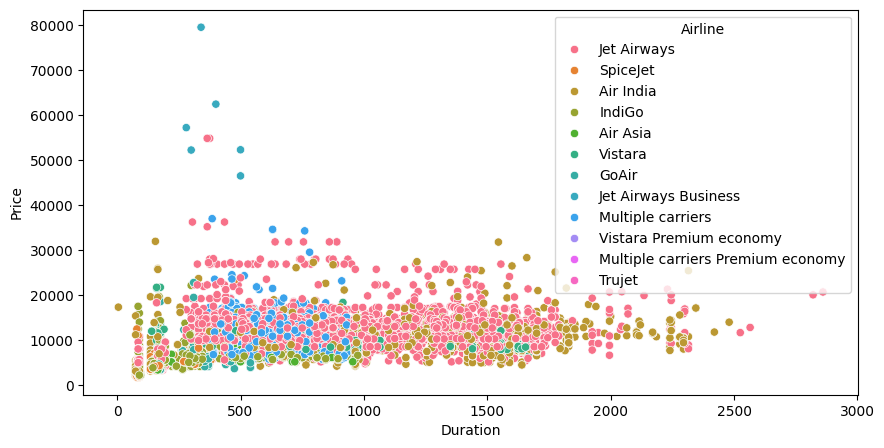

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=flightDf, x='Duration', y='Price', hue='Airline')
plt.show()

# Google Playstore

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [ ]:
playstoreDf = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [ ]:
playstoreDf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
playstoreDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


There are 10831 rows and 13 columns in the Google Playstore dataset

Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [ ]:
# Remove the row with the category not applicable to analysis
playstoreDf = playstoreDf[~playstoreDf['Category'].str.contains('1.9')]

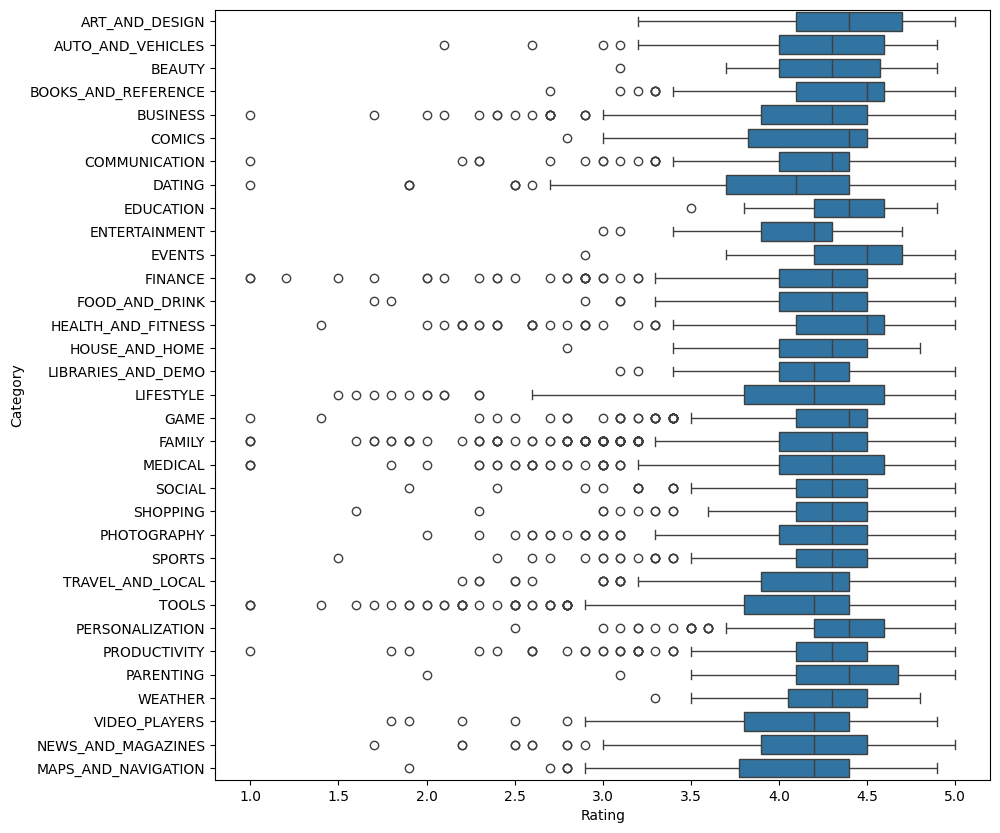

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=playstoreDf, x='Rating', y='Category')
plt.show()

Categories for Events and Fitness has the highest mean rating according to the boxplot

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

Running playstoreDf.info() describes that Rating has some missing values with only 8196 non-null values. This can introduce bias to analysis and maybe skewed to the available data.

In [ ]:
playstoreDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [ ]:
# Convert size column into float datatype
def convert_size(size):
  if 'M' in size.upper():
    x=size.strip('M')
    return int(float(x))*1024
  elif 'k' in size.lower():
    x=size.strip('k')
    return int(float(x))
  else:
    return np.nan

In [ ]:
playstoreDf['Size'] = playstoreDf['Size'].apply(convert_size)

<ipython-input-9-304d1aeaa80e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstoreDf['Size'] = playstoreDf['Size'].apply(convert_size)


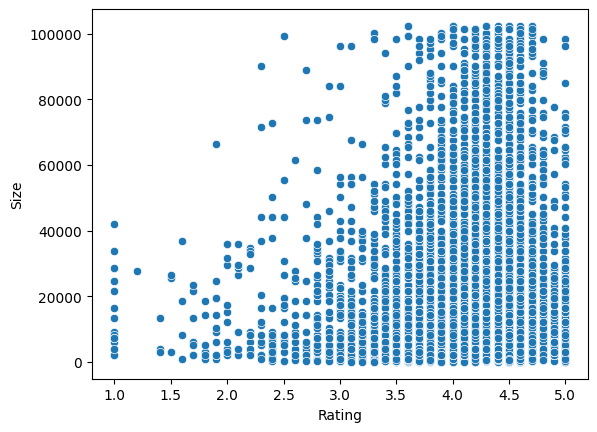

In [ ]:
sns.scatterplot(data=playstoreDf, y='Size', x='Rating')
plt.show()

As shown in the scatterplot, there is no much relationship between Rating and Size of the App.

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

---



In [ ]:
cols = ['Installs', 'Price']
chars_to_remove=['+', ',', '$']
for col in cols:
    for j in chars_to_remove:
        playstoreDf[col] = playstoreDf[col].str.replace(j, '')

<ipython-input-11-17112ddd80c9>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  playstoreDf[col] = playstoreDf[col].str.replace(j, '')
<ipython-input-11-17112ddd80c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstoreDf[col] = playstoreDf[col].str.replace(j, '')


In [ ]:
playstoreDf['Installs']=playstoreDf['Installs'].astype('float')
playstoreDf['Price']=playstoreDf['Price'].astype('float')

<ipython-input-12-56b78f05eb21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstoreDf['Installs']=playstoreDf['Installs'].astype('float')
<ipython-input-12-56b78f05eb21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstoreDf['Price']=playstoreDf['Price'].astype('float')


In [ ]:
# Remove price = 0 for better analysis of the price
filteredDf = playstoreDf[playstoreDf['Price'] != 0]

In [ ]:
avg_price = filteredDf.groupby('Category')['Price'].mean()
avg_price

Category
ART_AND_DESIGN           1.990000
AUTO_AND_VEHICLES        4.490000
BOOKS_AND_REFERENCE      4.277500
BUSINESS                13.233571
COMMUNICATION            3.079259
DATING                   4.490000
EDUCATION                4.490000
ENTERTAINMENT            3.990000
EVENTS                 109.990000
FAMILY                  12.747539
FINANCE                170.637059
FOOD_AND_DRINK           4.240000
GAME                     3.461446
HEALTH_AND_FITNESS       4.208750
LIBRARIES_AND_DEMO       0.990000
LIFESTYLE              124.256316
MAPS_AND_NAVIGATION      5.390000
MEDICAL                 13.210642
NEWS_AND_MAGAZINES       1.990000
PARENTING                4.790000
PERSONALIZATION          1.854940
PHOTOGRAPHY              6.100455
PRODUCTIVITY             8.961786
SHOPPING                 2.740000
SOCIAL                   5.323333
SPORTS                   4.166667
TOOLS                    3.426282
TRAVEL_AND_LOCAL         4.162500
VIDEO_PLAYERS            2.615000
WEATH

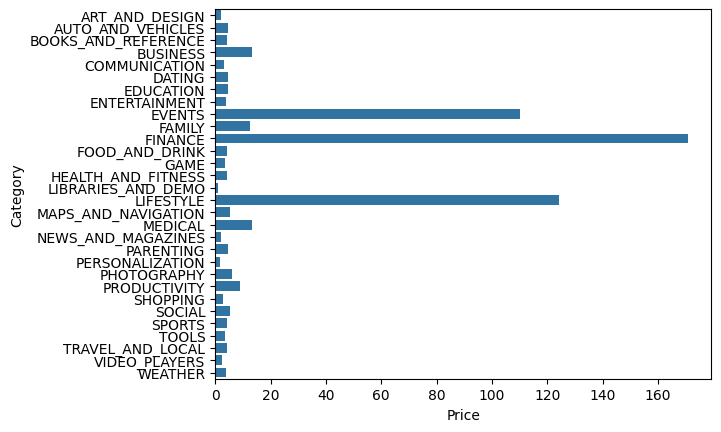

In [ ]:
sns.barplot(x=avg_price.values, y=avg_price.index)
plt.xlabel('Price')
plt.show()

The highest average app price is in Finance Category, next are Lifestyle and Events categories respectively for paid apps only.

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [ ]:
top_10_popular = playstoreDf.sort_values(by='Installs', ascending=False).head(10)

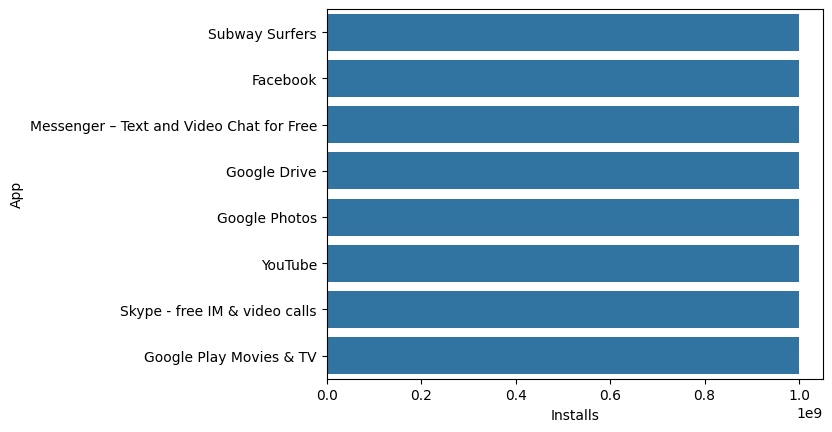

In [ ]:
sns.barplot(data=top_10_popular, x='Installs', y='App')
plt.show()

Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

For the most popular app category, the features 'Category' and 'Rating' can be analyzed to make recommendations for the company.



In [ ]:
# Get the top 10 categories by average rating
top_rating_cat = playstoreDf.groupby('Category')['Rating'].mean().sort_values(ascending = False).head(10)

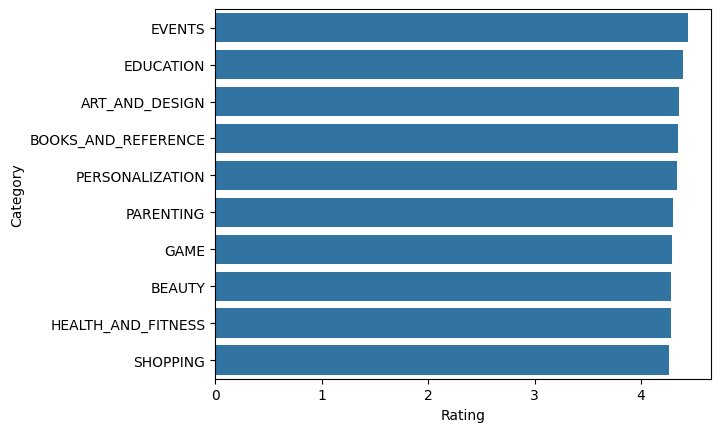

In [ ]:
sns.barplot(y=top_rating_cat.index, x=top_rating_cat.values)
plt.xlabel('Rating')
plt.show()

The features 'Category' and 'Rating' can be also analyzed to make recommendations for the company.

In [ ]:
# Get the top 10 categories by number of installs
top_install_cat = playstoreDf.groupby('Category')['Installs'].sum().sort_values(ascending = False).head(10)

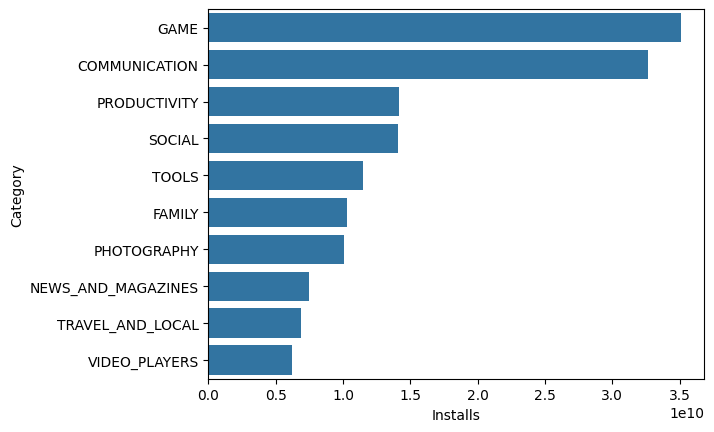

In [ ]:
sns.barplot(y=top_install_cat.index, x=top_install_cat.values)
plt.xlabel('Installs')
plt.show()

As you can see from the barplot above, Game Apps are the most popular apps in term of install counts. Next are Communication apps and Tools apps.

Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

Since the data does not include the app developers, let's consider each app. We can check the revenue generated with the paid apps only using the number of installs.

In [ ]:
newDf = playstoreDf.drop_duplicates(subset='App', keep='first')
revenueApp = newDf['Installs'] * newDf['Price']
top_10_revenue = revenueApp[revenueApp.values != 0].sort_values(ascending = False).head(10)
top_10_revenue.index = newDf.loc[top_10_revenue.index, 'App']
top_10_revenue

App
Minecraft                        69900000.0
I am rich                        39999000.0
I Am Rich Premium                19999500.0
Hitman Sniper                     9900000.0
Grand Theft Auto: San Andreas     6990000.0
Sleep as Android Unlock           5990000.0
Facetune - For Free               5990000.0
DraStic DS Emulator               4990000.0
I'm Rich - Trump Edition          4000000.0
💎 I'm rich                        3999900.0
dtype: float64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


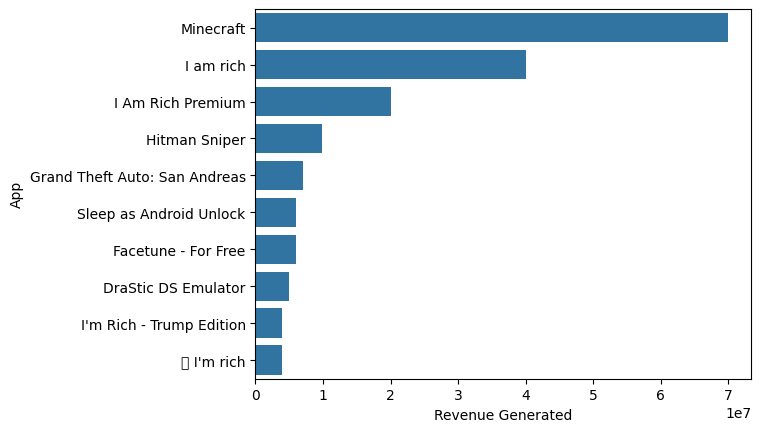

In [ ]:
sns.barplot(y=top_10_revenue.index, x=top_10_revenue.values)
plt.xlabel('Revenue Generated')
plt.show()

As per the bar char above, Minecraft has the most revenue generated and most successful app developer in regard to the number of installs and the paid price of the app. This however does not include the in-app purchases.

Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [ ]:
# Convert the Last Update into datetime datatype
playstoreDf['Last Updated'] = pd.to_datetime(playstoreDf['Last Updated'])

Get the number of installs per month

In [ ]:
monthUpdate = playstoreDf['Last Updated'].dt.month
installPerMonth = playstoreDf.groupby(monthUpdate)['Installs'].sum()
installPerMonth

Last Updated
1     1.186499e+09
2     1.017961e+09
3     1.186029e+09
4     2.893865e+09
5     6.232315e+09
6     8.186208e+09
7     7.444291e+10
8     6.866838e+10
9     4.601723e+08
10    5.903741e+08
11    1.618368e+09
12    1.150350e+09
Name: Installs, dtype: float64

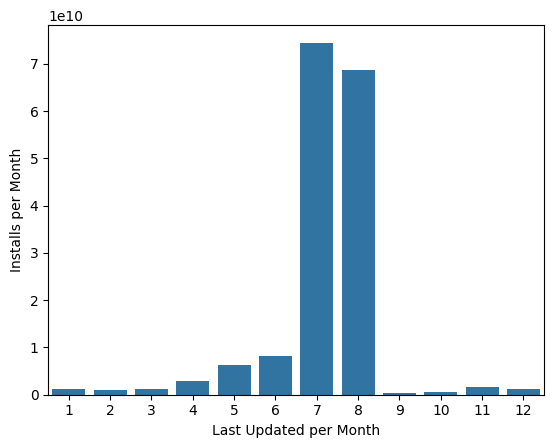

In [ ]:
sns.barplot(x=installPerMonth.index, y=installPerMonth.values)
plt.xlabel('Last Updated per Month')
plt.ylabel('Installs per Month')
plt.show()

As per the barplot above with number of installs and last updated per month, July and June months have the most number of installs in a year. For these insights, it is recommended to launch the app between these months.